# IDDAS Information 

### + Analysis of conformation to DCAT-AP

## setup
below functions are needed to setup the sparql template and querying support

The endpoint is hard-coded in the python code

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from enable_sparql import execute_to_df, generate_sparql

All requests give us information about IDDAS:
- Property and type list
- Number of datasets, distributions, download URL and media type
- Information to catalogs list (numbers of datasets, download url and distribution)

This request shows us all the properties used in IDDAS and how many use.

In [18]:
# List all properties/predicates in the data (+ their occurrence count)
all_props = execute_to_df('./sparql_requests/all_props.sparql')
print(all_props)

                                             property   count
0     http://www.w3.org/1999/02/22-rdf-syntax-ns#type  357265
1                      http://www.w3.org/ns/prov#used   80484
2                      http://purl.org/dc/terms/title   68952
3                             https://schema.org/name   56112
4                 https://schema.org/variableMeasured   56112
5              http://www.w3.org/ns/dcat#distribution   46432
6             http://www.w3.org/ns/dcat#accessService   42046
7                http://purl.org/dc/terms/description   35010
8             http://www.w3.org/ns/dcat#servesDataset   29795
9                 http://www.w3.org/ns/dcat#accessURL   28749
10                  http://www.w3.org/ns/dcat#dataset   23587
11                   http://purl.org/dc/terms/creator   21564
12                    http://www.w3.org/ns/dcat#theme   21542
13                   http://purl.org/dc/terms/spatial   21342
14                     http://www.w3.org/ns/dcat#bbox   21342
15      

This request shows us all the types used in IDDAS and how many use.

In [4]:
# List all Classes in the data (& their occurrence count)
all_types = execute_to_df('./sparql_requests/all_types.sparql')
all_types

,type,cnt
0,http://www.w3.org/2000/01/rdf-schema#Resource,166416
1,https://schema.org/PropertyValue,56112
2,http://www.w3.org/ns/dcat#Distribution,46432
3,http://www.w3.org/ns/dcat#Dataset,23587
4,https://schema.org/Dataset,23587
5,http://purl.org/dc/terms/Location,21342
6,http://purl.org/dc/terms/PeriodOfTime,17028
7,http://www.w3.org/2004/02/skos/core#Concept,1172
8,http://www.w3.org/ns/dcat#DataService,345
9,http://www.w3.org/ns/sosa/ObservedProperty,304


#### DataCatalog level

Classes: dcat:Catalog (& hydra:PartialCollectionView)

In [19]:
dataCatalog_info = execute_to_df('./sparql_requests/dcatCatalog.sparql')

In [20]:
#number of data catalogs
dataCatalogs = dataCatalog_info['s'].drop_duplicates()

for i, datacatalog in enumerate(dataCatalogs):
    print(i+1, datacatalog)

1 https://essi-lab.eu/dab/fair-ease/catalog/FROMREGISTRY--regprefseparator--registrytestid1--regprefseparator--dad0859e-206c-480b-a080-d4eea70ee22d
2 https://essi-lab.eu/dab/fair-ease/catalog/marineID
3 https://essi-lab.eu/dab/fair-ease/catalog/wekeo
4 https://essi-lab.eu/dab/fair-ease/catalog/usnodcdbid
5 https://essi-lab.eu/dab/fair-ease/catalog/jrcdatacatalogdbid
6 https://essi-lab.eu/dab/fair-ease/catalog/UUID-456602db-4275-4410-8b68-436fd23ace69
7 https://essi-lab.eu/dab/fair-ease/catalog/emodnet-network
8 https://data.blue-cloud.org/search/dcat/argo?page=1
9 https://data.blue-cloud.org/search/dcat/emodnet-chemistry
10 https://data.blue-cloud.org/search/dcat/emso
11 https://data.blue-cloud.org/search/dcat/eurobis
12 https://data.blue-cloud.org/search/dcat/icos
13 https://data.blue-cloud.org/search/dcat/seadatanet-products
14 https://data.blue-cloud.org/search/dcat/sios


In [21]:
# types of datacatalog
datacatalog_type = dataCatalog_info['type'].drop_duplicates()
for dc_type in datacatalog_type:
    print(dc_type)

http://www.w3.org/ns/dcat#Catalog
http://www.w3.org/2000/01/rdf-schema#Resource
http://www.w3.org/ns/hydra/core#PartialCollectionView


In [22]:
# predicates associated with dcat:Catalogs
catalog_predicates = execute_to_df('./sparql_requests/catalog_predicates.sparql')
catalog_predicates['p']

0    http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1         http://www.w3.org/2000/01/rdf-schema#label
2                  http://www.w3.org/ns/dcat#dataset
3                     http://purl.org/dc/terms/title
4               http://purl.org/dc/terms/description
5         http://www.w3.org/ns/hydra/core#totalItems
6       http://www.w3.org/ns/hydra/core#itemsPerPage
7          http://www.w3.org/ns/hydra/core#firstPage
8           http://www.w3.org/ns/hydra/core#lastPage
Name: p, dtype: object

In [25]:
# predicates associated with PartialCollectionView
pCV_p_o = execute_to_df('./sparql_requests/partialCollectionView.sparql')

pCV_p_o['p'].drop_duplicates()

0                     http://purl.org/dc/terms/title
1    http://www.w3.org/1999/02/22-rdf-syntax-ns#type
4               http://purl.org/dc/terms/description
5                  http://www.w3.org/ns/dcat#dataset
Name: p, dtype: object

notes:  
DCAT-AP has outgoing predicates (that are missing in results here):  
- dct:publisher
- dct:creator
- dct:language
- foaf:homepage
- dcat:catalog

#### Dataset level

Class: dcat:Dataset

In [27]:
# predicates associated with dcat:Dataset
dataset_info = execute_to_df('./sparql_requests/dataset_predicates.sparql')
dataset_info

,p
0,http://purl.org/dc/terms/title
1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
2,http://www.w3.org/ns/dcat#theme
3,http://purl.org/dc/terms/description
4,http://purl.org/dc/terms/issued
5,http://www.w3.org/ns/dcat#distribution
6,http://purl.org/dc/terms/identifier
7,http://purl.org/dc/terms/temporal
8,http://purl.org/dc/terms/spatial
9,https://schema.org/variableMeasured


notes:  
DCAT AP has outgoing predicate (that are missing in results here):  
- dqv:hasQualityMeasurment  

(results show prov:used associated to Dataset, which is not in the DCAT-AP)

In [28]:
# values of triples: dcat:Dataset --prov:used--> object
execute_to_df('./sparql_requests/dataset_provused.sparql')

#values are literal (string), not a prov:Activity

,o
0,31
1,WRC
2,APEX_SBE
3,ARGO
4,US ARGO PROJECT
...,...
995,Sediment analysis
996,Sex composition
997,Species composition
998,Fishing effort statistics


#### Distribution level

class: dcat:Distribution

In [29]:
# predicates associated with dcat:Distribution
execute_to_df('./sparql_requests/distribution_predicates.sparql')

,p
0,http://purl.org/dc/terms/title
1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
2,http://www.w3.org/ns/dcat#accessService
3,http://www.w3.org/ns/dcat#accessURL
4,http://www.w3.org/ns/dcat#downloadURL
5,http://purl.org/dc/terms/description
6,http://www.w3.org/ns/dcat#mediaType


notes:  
DCAT-AP has outoging predicates (that are missing in results here):
- dcat:byteSize

In [31]:
# List mediatypes present in the queried data
mediatypes = execute_to_df('./sparql_requests/mediatypes.sparql')
print(list(mediatypes['o']))

['https://www.iana.org/assignments/media-types/application/netcdf', 'https://www.iana.org/assignments/media-types/application/zip']


#### Dataservice level

Class: dcat:DataService

In [14]:
# predicates associated with dcat:DataService
execute_to_df('./sparql_requests/dataservice_predicates.sparql')

,p
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1,http://purl.org/dc/terms/type
2,http://www.w3.org/ns/dcat#servesDataset
3,http://www.w3.org/ns/dcat#endpointURL
4,http://purl.org/dc/terms/conformsTo
5,http://www.w3.org/ns/dcat#endpointDescription
6,http://purl.org/dc/terms/description


notes:  
All outgoing predicates of DCAT-AP are present 

This request shows us number of type per type per property

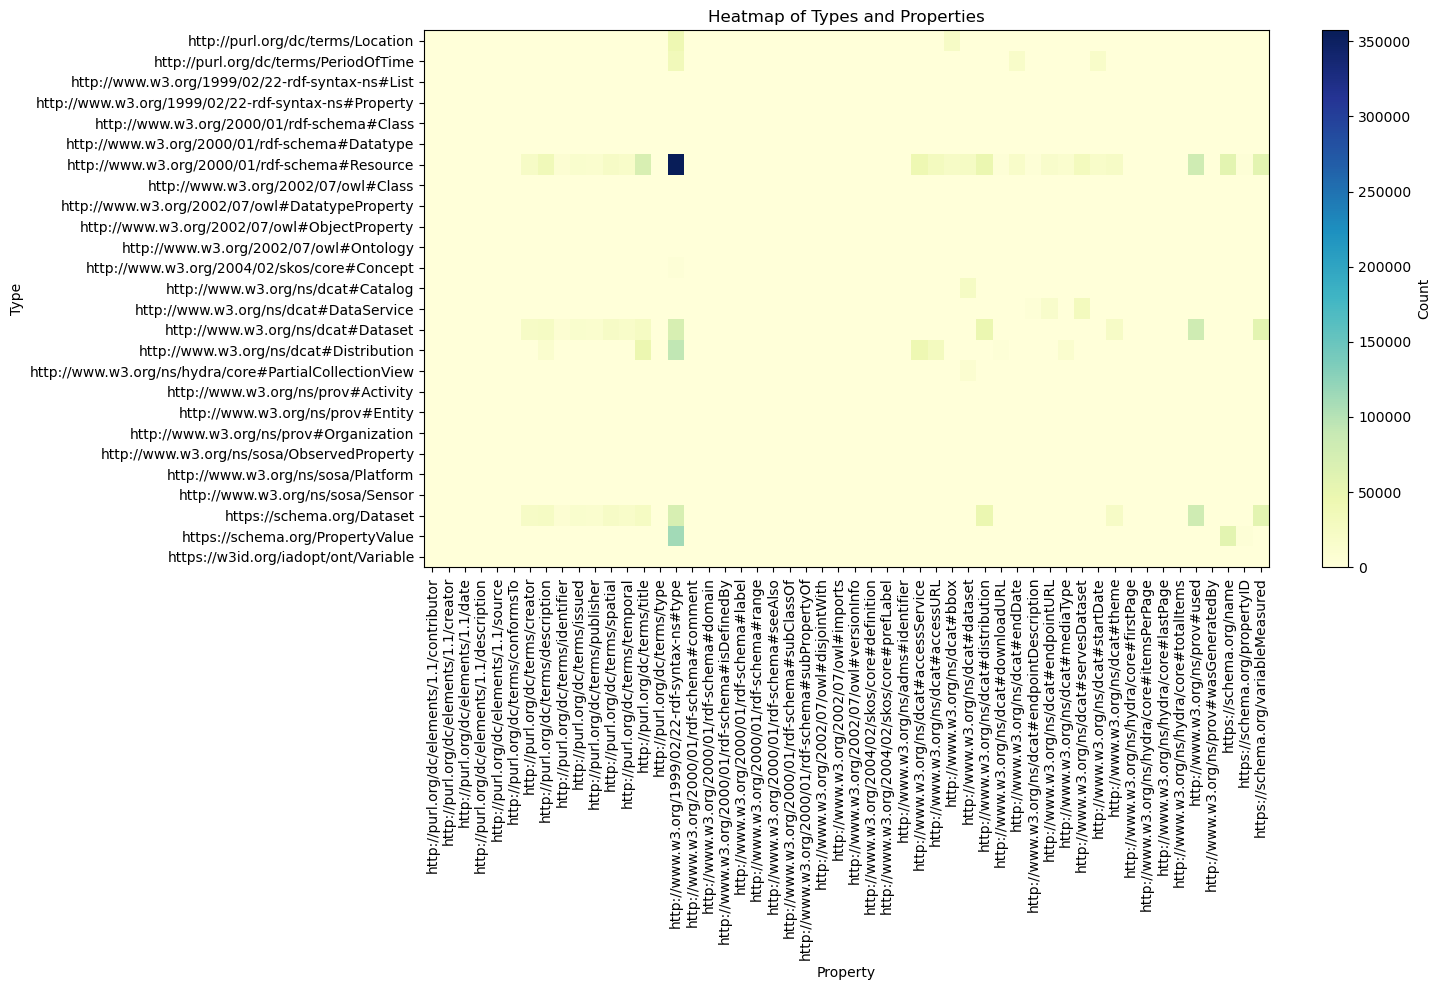

In [15]:
df = execute_to_df('./sparql_requests/all_types_props.sparql')

# Ensure that 'count' column is numeric
df['count'] = pd.to_numeric(df['count'])

# Create a pivot table to mix the counts for type and predicate
pivot_df = df.pivot_table(values='count', index='type', columns='property', aggfunc='sum', fill_value=0)

# Plotting the heatmap using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(pivot_df.values, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Count')
plt.xticks(ticks=range(len(pivot_df.columns)), labels=pivot_df.columns, rotation=90)
plt.yticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index)
plt.xlabel('Property')
plt.ylabel('Type')
plt.title('Heatmap of Types and Properties')
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
df

,property,type,count
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2000/01/rdf-schema#Resource,357265
1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://schema.org/PropertyValue,112224
2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/ns/dcat#Distribution,92864
3,http://www.w3.org/ns/prov#used,http://www.w3.org/2000/01/rdf-schema#Resource,80484
4,http://www.w3.org/ns/prov#used,http://www.w3.org/ns/dcat#Dataset,80296
...,...,...,...
223,http://www.w3.org/ns/hydra/core#itemsPerPage,http://www.w3.org/ns/hydra/core#PartialCollect...,1
224,http://www.w3.org/ns/hydra/core#lastPage,http://www.w3.org/2000/01/rdf-schema#Resource,1
225,http://www.w3.org/ns/hydra/core#lastPage,http://www.w3.org/ns/dcat#Catalog,1
226,http://www.w3.org/ns/hydra/core#lastPage,http://www.w3.org/ns/hydra/core#PartialCollect...,1


Catalog list :
- Number of datasets
- Number of datasets with distribution
- Number of datasets with download URL
- Number of datasets with access URL
- Number of datasets with identifier
- Number of datasets with media type

In [14]:
df = execute_to_df('./sparql_requests/catalog_info.sparql')
df

,catalog_name,cnt_datasets,cnt_datasets_dist,cnt_datasets_dlurl,cnt_datasets_accessurl,cnt_datasets_id,cnt_datasets_mediatype
0,All catalog,23587,20885,1100,8507,7349,12250
1,WEkEO,2005,0,0,0,0,0
2,VITO /Copernicus Global Land Services,127,127,0,127,127,0
3,US NODC Collections,100,1,0,1,98,0
4,Joint Research Centre Data Catalog,3501,3162,0,3162,0,0
5,European Marine Observation and Data Network (...,4605,4348,1013,4220,3787,0
6,European Environment Agency SDI Catalog,722,720,87,720,718,0
7,Copernicus Marine Environment Monitoring Servi...,277,277,0,277,277,0
8,Blue-Cloud DD&AS argo DCAT Catalog - Page 1,9908,9908,0,0,0,9908
9,Blue-Cloud DD&AS SeaDataNet Products DCAT Catalog,49,49,0,0,49,49


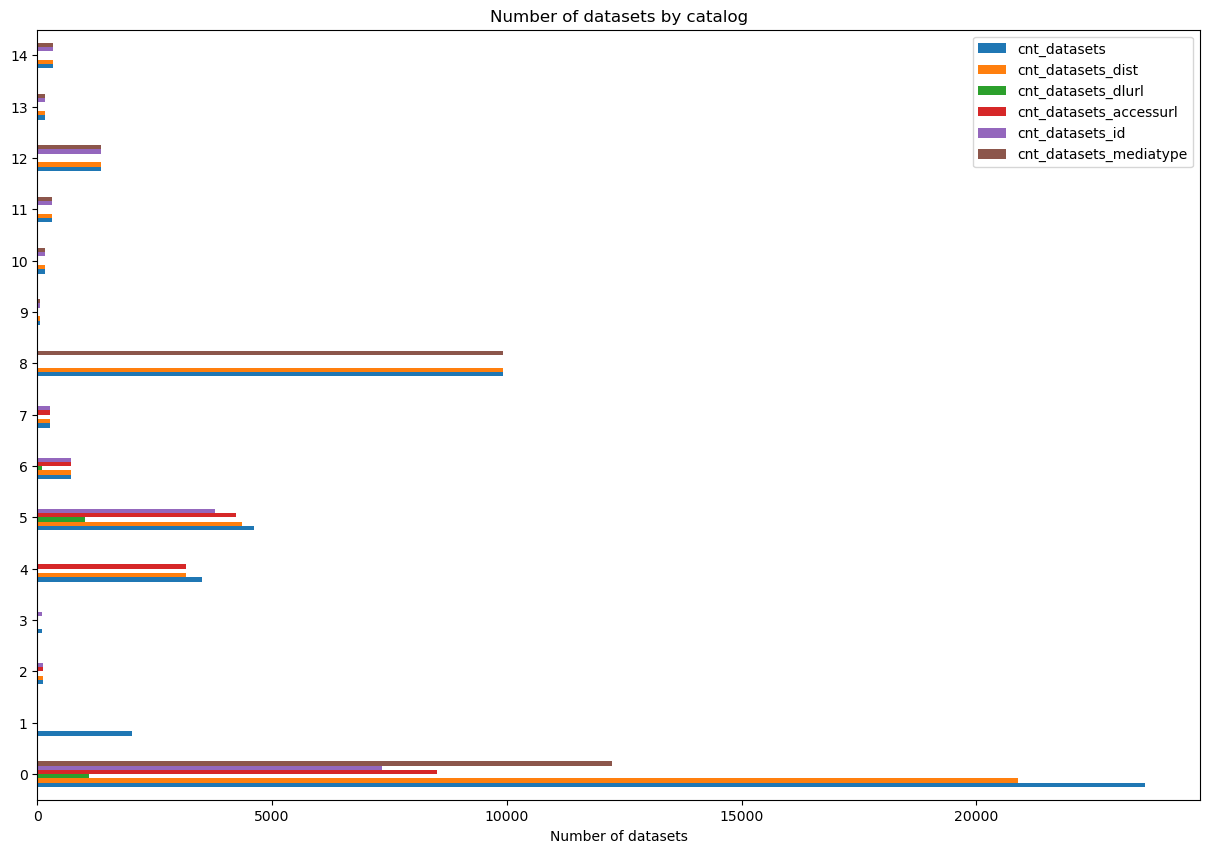

In [15]:
numeric_columns = [
    'cnt_datasets', 'cnt_datasets_dist', 'cnt_datasets_dlurl', 
    'cnt_datasets_accessurl', 'cnt_datasets_id', 'cnt_datasets_mediatype'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plot_data = df[numeric_columns]
plot_data.plot(kind='barh', figsize=(15, 10))
plt.title('Number of datasets by catalog')
plt.xlabel('Number of datasets')
plt.show()
